##**Importanción de librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from scipy import fft
from scipy.signal import detrend

##**Carga del archivo**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/ECGDataDenoised.zip .


##**Extracción de los registros que correspondan a bradicardia sinusal**

In [4]:
df_pacientes = pd.read_excel('/content/drive/MyDrive/Diagnostics.xlsx')
SB = df_pacientes[df_pacientes['Rhythm'] == 'SB']
SB_files = SB['FileName'].tolist()


zip_path = 'ECGDataDenoised.zip'
output_dir = 'ECGDataDenoised/FilteredFiles'

os.makedirs(output_dir, exist_ok=True)
extracted_files = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if any(sb_file in file_name for sb_file in SB_files):
            zip_ref.extract(file_name, output_dir)
            extracted_files.append(file_name)

bradicardia_sinusal = pd.DataFrame(extracted_files, columns=['ExtractedFiles'])
print(bradicardia_sinusal)


                                      ExtractedFiles
0     ECGDataDenoised/MUSE_20180111_155758_17000.csv
1     ECGDataDenoised/MUSE_20180111_155839_67000.csv
2     ECGDataDenoised/MUSE_20180111_155859_36000.csv
3     ECGDataDenoised/MUSE_20180111_155907_78000.csv
4     ECGDataDenoised/MUSE_20180111_160033_11000.csv
...                                              ...
3884  ECGDataDenoised/MUSE_20180120_123723_19000.csv
3885  ECGDataDenoised/MUSE_20180120_123729_60000.csv
3886  ECGDataDenoised/MUSE_20180120_123811_50000.csv
3887  ECGDataDenoised/MUSE_20180120_123813_67000.csv
3888  ECGDataDenoised/MUSE_20180120_123819_05000.csv

[3889 rows x 1 columns]


##**Extracción de los registros que correspondan a fibrilación auricular**

In [5]:
df_pacientes = pd.read_excel('/content/drive/MyDrive/Diagnostics.xlsx')
AFIB = df_pacientes[df_pacientes['Rhythm'] == 'AFIB']
AFIB_files = AFIB['FileName'].tolist()


zip_path = 'ECGDataDenoised.zip'
output_dir = 'ECGDataDenoised/FilteredFiles'

os.makedirs(output_dir, exist_ok=True)
extracted_files1 = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if any(sb_file in file_name for sb_file in AFIB_files):
            zip_ref.extract(file_name, output_dir)
            extracted_files1.append(file_name)

fibrilación_auricular = pd.DataFrame(extracted_files1, columns=['ExtractedFiles'])
print(fibrilación_auricular)

                                      ExtractedFiles
0     ECGDataDenoised/MUSE_20180111_155154_74000.csv
1     ECGDataDenoised/MUSE_20180111_155203_15000.csv
2     ECGDataDenoised/MUSE_20180111_155903_57000.csv
3     ECGDataDenoised/MUSE_20180111_155945_02000.csv
4     ECGDataDenoised/MUSE_20180111_160053_89000.csv
...                                              ...
1775  ECGDataDenoised/MUSE_20180712_161449_58000.csv
1776  ECGDataDenoised/MUSE_20180712_161451_72000.csv
1777  ECGDataDenoised/MUSE_20180712_161452_78000.csv
1778  ECGDataDenoised/MUSE_20180712_161503_00000.csv
1779  ECGDataDenoised/MUSE_20180712_161505_16000.csv

[1780 rows x 1 columns]


In [6]:
!unzip ECGDataDenoised.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ECGDataDenoised/MUSE_20180116_125802_57000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125812_73000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125822_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125825_58000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125842_09000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125845_27000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125847_39000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125906_02000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125918_29000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125919_34000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125921_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125925_64000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125946_45000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125948_54000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_130000_80000.csv  
  inflati

##**Programación de las formulas**

In [7]:
# Archivo de fibrilación auricular
datos_1 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180111_155154_74000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_1.head()



,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-29.021,-2.116300,15.3290,15.8030,-21.057,7.6391,-108.79,-234.34,-194.38,-56.177,35.095,581.60
1,-24.839,0.028884,13.2700,13.2360,-17.900,8.2031,-111.05,-232.20,-190.61,-57.139,29.429,575.61
2,-21.031,2.204800,11.6180,10.7360,-15.104,8.8523,-113.25,-231.91,-189.64,-58.824,23.693,569.28
3,-17.969,4.209700,10.5400,8.5333,-12.918,9.4945,-115.40,-234.76,-192.78,-62.103,18.076,562.34
4,-15.853,5.657600,9.8526,6.9250,-11.355,9.8536,-117.60,-241.31,-199.74,-67.830,13.046,554.68


In [8]:
# Archivo de bradicardia sinusal
datos_2 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180120_123813_67000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_2.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,43.442,22.272,5.96210,-36.253,16.879,16.7980,-6.0427,-13.822,14.0590,84.415,43.528,12.249
1,46.238,18.719,-0.95161,-35.228,22.186,12.2040,-11.8980,-16.513,11.4820,81.686,48.689,25.060
2,48.771,15.831,-6.93570,-34.502,26.750,8.2647,-17.0810,-19.498,8.0163,77.993,51.899,35.994
3,50.145,13.677,-11.02400,-33.708,29.588,5.3995,-21.0590,-22.868,3.2255,72.706,51.886,43.559
4,49.114,11.457,-12.76900,-31.832,29.901,3.4131,-23.5650,-26.456,-2.7110,65.723,48.372,46.906


In [9]:
señal_fibrilacion = datos_1['II'].values
señal_bradicardia= datos_2['II'].values
fs = 500

###**1. Detrendig**

In [10]:
detrend_ekgf = detrend(señal_fibrilacion)
detrend_ekgb = detrend(señal_bradicardia)

###**2. Compression**

Text(0, 0.5, 'Derivada II')

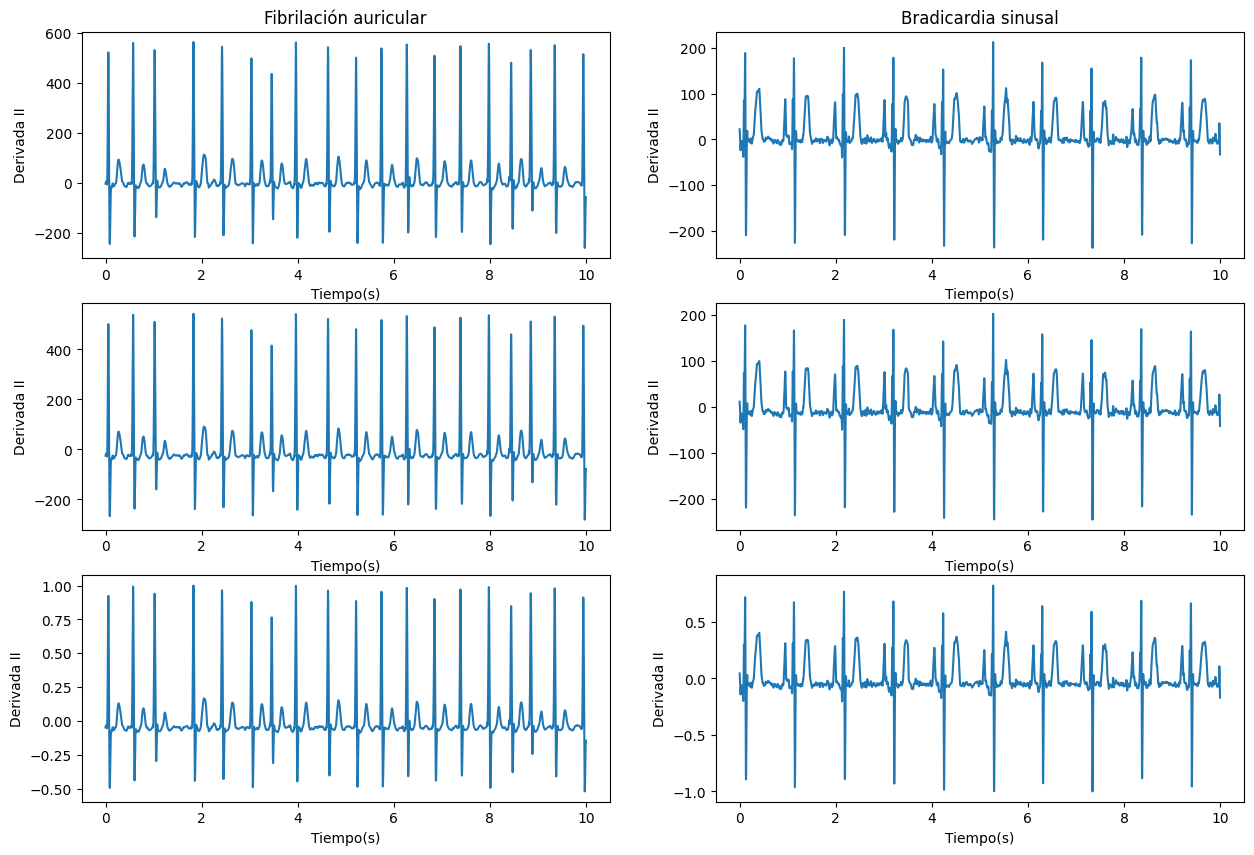

In [11]:
def compresion(señal):
  max_value = np.max(np.abs(señal))
  min_value = np.min(np.abs(señal))
  compressed_ekg = (señal-min_value) / (max_value-min_value)

  return compressed_ekg

compresionf = compresion(detrend_ekgf)
compresionb = compresion(detrend_ekgb)

plt.figure(figsize=(15, 10))

#Fibrilación
plt.subplot(3,2,1)
tiempo1 = np.arange(0, señal_fibrilacion.shape[0]/fs,1/fs)
plt.plot(tiempo1,señal_fibrilacion)
plt.title('Fibrilación auricular')
plt.xlabel('Tiempo(s)')
plt.ylabel('Derivada II')

plt.subplot(3,2,3)
plt.plot(tiempo1,detrend_ekgf)
plt.xlabel('Tiempo(s)')
plt.ylabel('Derivada II')

plt.subplot(3,2,5)
plt.plot(tiempo1,compresionf)
plt.xlabel('Tiempo(s)')
plt.ylabel('Derivada II')

#Bradicardia
plt.subplot(3,2,2)
tiempo2 = np.arange(0, señal_bradicardia.shape[0]/fs,1/fs)
plt.plot(tiempo2,señal_bradicardia)
plt.title('Bradicardia sinusal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Derivada II')

plt.subplot(3,2,4)
plt.plot(tiempo2,detrend_ekgb)
plt.xlabel('Tiempo(s)')
plt.ylabel('Derivada II')

plt.subplot(3,2,6)
plt.plot(tiempo2,compresionb)
plt.xlabel('Tiempo(s)')
plt.ylabel('Derivada II')


###**3.  Biespectro**

In [12]:
def biespectro(segmento):
  lista = []
  transformada_segmento = fft.fft(segmento)
  for i in range(20):
      for j in range(20):
        b_f1_f2 = np.sum(transformada_segmento[i] * transformada_segmento[j] * np.conj(transformada_segmento[i+j]))
        lista.append(b_f1_f2)
  return lista

biespectro_f = biespectro(compresionf)
biespectro_b = biespectro(compresionb)

###**3.1  Magnitud**

In [13]:
def magnitud(compressed_ekg):
  window_size = 500
    #Dividimos la señal en 10 segmentos de 500 puntos cada uno
  segments = [compressed_ekg[i:i + window_size] for i in range(0, len(compressed_ekg), window_size)]

  bic = []
  for i in segments:
      bic.append(biespectro(i))

  num = np.abs(np.array(bic[0])+np.array(bic[1])+np.array(bic[2])+np.array(bic[3])+np.array(bic[4])+np.array(bic[5])+np.array(bic[6])+np.array(bic[7])+np.array(bic[8])+np.array(bic[9]))
  magnitud = num.reshape(20,20)
  mag_sim = np.zeros((20,20))

  for F1 in range(20):
    for F2 in range(F1, 20-F1):
      mag_sim[F1,F2] = magnitud[F2,F1]
  return mag_sim

magnitud_f = magnitud(compresionf)
magnitud_b = magnitud(compresionb)

###**3.2  Fase**

In [14]:
def fase(compressed_ekg):
  compressed_ekg = compresionf
  window_size = 500
    #Dividimos la señal en 10 segmentos de 500 puntos cada uno
  segments = [compressed_ekg[i:i + window_size] for i in range(0, len(compressed_ekg), window_size)]

  bic = []
  for i in segments:
      bic.append(biespectro(i))

  num = np.degrees(np.angle(np.array(bic[0])+np.array(bic[1])+np.array(bic[2])+np.array(bic[3])+np.array(bic[4])+np.array(bic[5])+np.array(bic[6])+np.array(bic[7])+np.array(bic[8])+np.array(bic[9])))
  fase = num.reshape(20,20)
  fase_sim = np.full((20, 20), np.nan)

  for F1 in range(20):
    for F2 in range(F1, 20-F1):
      fase_sim[F1,F2] = fase[F2,F1]
  return fase_sim

fase_f = fase(compresionf)
fase_b = fase(compresionb)


###**4. Bicoherencia**

In [15]:
def calcular(compressed_ekg):

  window_size = 500
  #Dividimos la señal en 10 segmentos de 500 puntos cada uno
  segments = [compressed_ekg[i:i + window_size] for i in range(0, len(compressed_ekg), window_size)]

  bic = []
  for i in segments:
      bic.append(biespectro(i))

  num = np.abs(np.array(bic[0])+np.array(bic[1])+np.array(bic[2])+np.array(bic[3])+np.array(bic[4])+np.array(bic[5])+np.array(bic[6])+np.array(bic[7])+np.array(bic[8])+np.array(bic[9]))


  den = np.abs(bic[0]) + np.abs(bic[1]) + np.abs(bic[2]) + np.abs(bic[3]) + np.abs(bic[4]) + np.abs(bic[5]) + np.abs(bic[6]) + np.abs(bic[7]) + np.abs(bic[8]) + np.abs(bic[9])

  bicoherencia = num/den

  bic_sim = np.zeros((20,20))

  reshaped = bicoherencia.reshape(20, 20)

  for F1 in range(20):
    for F2 in range(F1,20-F1):
      bic_sim[F1,F2] = reshaped[F1,F2]



  return bic_sim

bicoherencia_f= calcular(compresionf)
bicoherencia_b= calcular(compresionb)


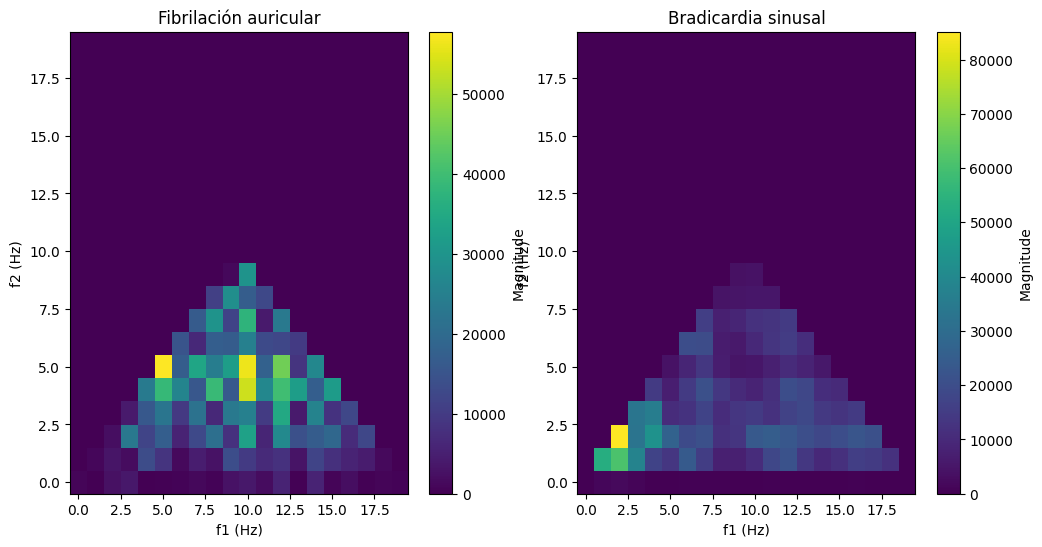

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(magnitud_f,  origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Fibrilación auricular')
plt.xlabel('f1 (Hz)')
plt.ylabel('f2 (Hz)')

plt.subplot(1,2,2)
plt.imshow(magnitud_b, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Bradicardia sinusal')
plt.xlabel('f1 (Hz)')
plt.ylabel('f2 (Hz)')


# Mostrar el gráfico
plt.show()

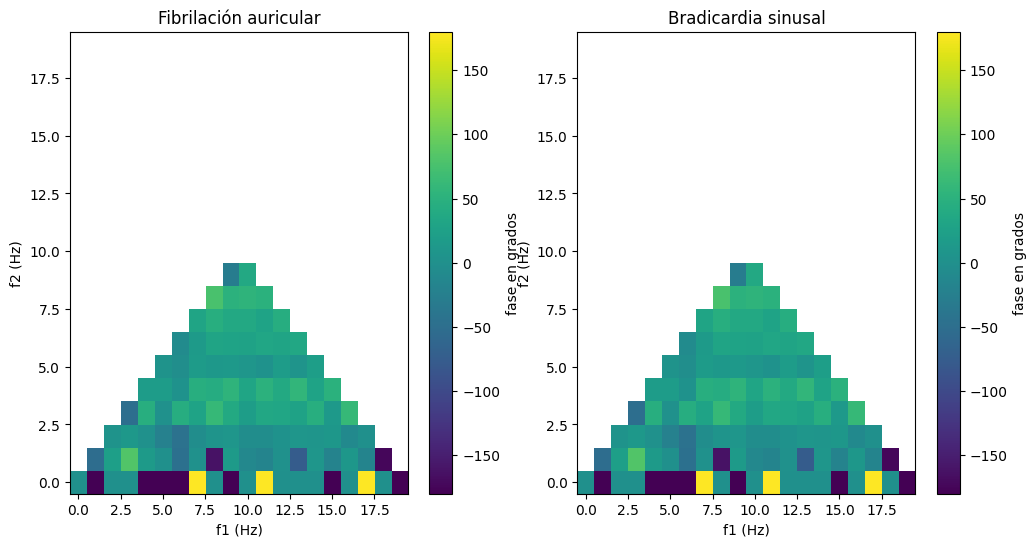

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(fase_f,  origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='fase en grados')
plt.title('Fibrilación auricular')
plt.xlabel('f1 (Hz)')
plt.ylabel('f2 (Hz)')

plt.subplot(1,2,2)
plt.imshow(fase_b, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='fase en grados')
plt.title('Bradicardia sinusal')
plt.xlabel('f1 (Hz)')
plt.ylabel('f2 (Hz)')


# Mostrar el gráfico
plt.show()

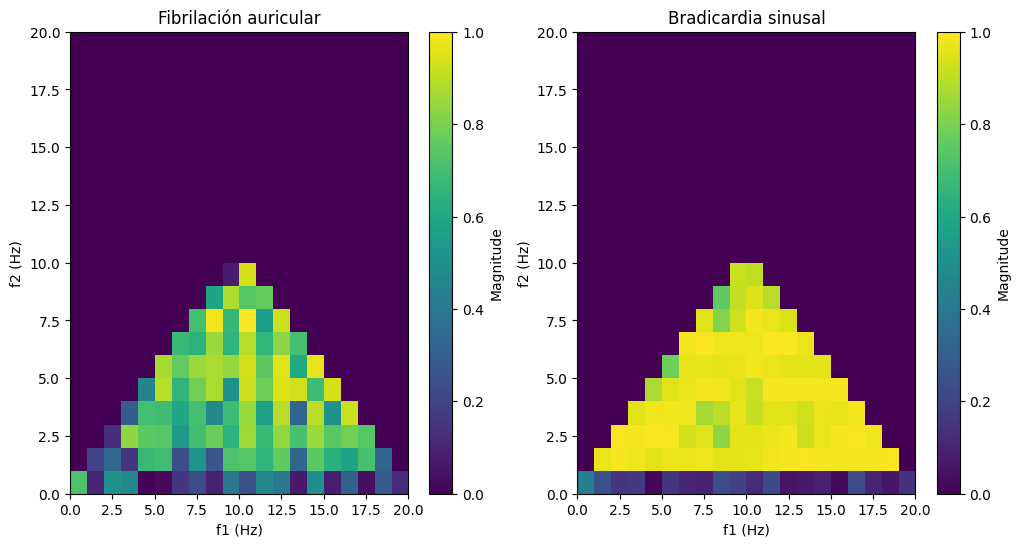

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(bicoherencia_f, extent=[0, 20, 0, 20], origin='lower', aspect='auto', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Magnitude')
plt.title('Fibrilación auricular')
plt.xlabel('f1 (Hz)')
plt.ylabel('f2 (Hz)')


plt.subplot(1,2,2)
plt.imshow(bicoherencia_b, extent=[0, 20, 0, 20], origin='lower', aspect='auto', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Magnitude')
plt.title('Bradicardia sinusal')
plt.xlabel('f1 (Hz)')
plt.ylabel('f2 (Hz)')


# Mostrar el gráfico
plt.show()

##**Frecuencia que contiene la máxima potencia**

Text(0, 0.5, 'Potencia')

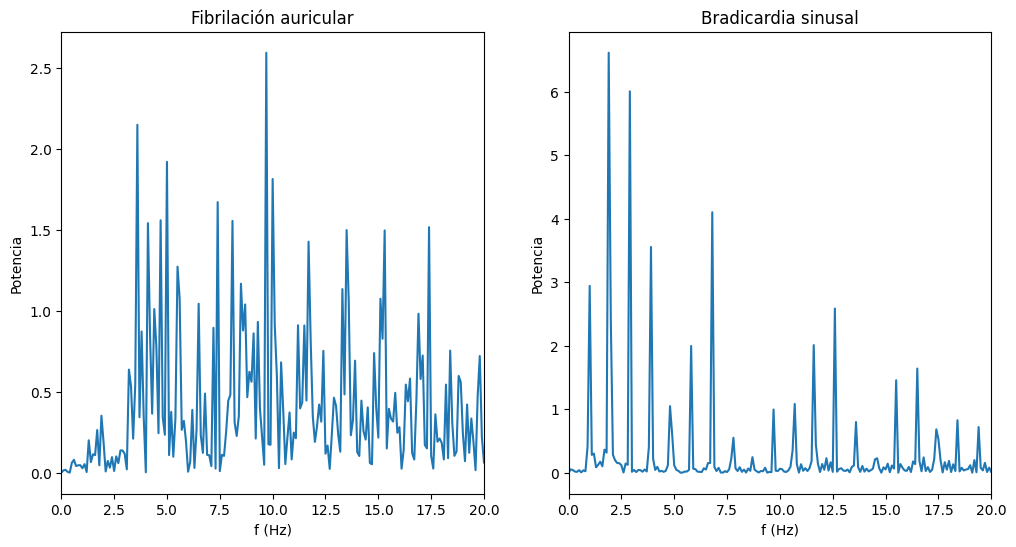

In [19]:
def fMP(compressed_ekg):
  EKG = fft.fft(compressed_ekg)
  N = 5000
  f = np.arange(0,fs,fs/N)
  potencia = np.power(np.abs(EKG),2)/N
  indice_max = np.argmax(potencia)
  frecuencia_max = f[indice_max]
  #print(f"La frecuencia donde la potencia es máxima es: {frecuencia_max} Hz")

  return frecuencia_max,f,potencia

fre_max_f = fMP(compresionf)
fre_max_b = fMP(compresionb)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(fre_max_f[1], fre_max_f[2])
plt.title('Fibrilación auricular')
plt.xlim([0,20])
plt.xlabel('f (Hz)')
plt.ylabel('Potencia')


plt.subplot(1,2,2)
plt.plot(fre_max_b[1], fre_max_b[2])
plt.title('Bradicardia sinusal')
plt.xlim([0,20])
plt.xlabel('f (Hz)')
plt.ylabel('Potencia')

##**Suma del número de frecuencias que son significativas para bicoherencia**

In [20]:
def sFSB (compressed_ekg):
  N = 10
  nivel_significancia = np.sqrt(9.2/(2*N))
  v_bicoherencia = calcular(compressed_ekg) > nivel_significancia
  suma = np.sum(v_bicoherencia)

  #print(f"Suma del número de frecuencias que son significativas para bicoherencia(sFSB): {suma} ")

  return suma

sFSB_f = sFSB(compresionf)
sFSB_b = sFSB(compresionb)

##**Función**

In [21]:
def procesamiento_señal(señal):

  datos_1 = pd.read_csv(f'/content/ECGDataDenoised/{señal}' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
  señal_paciente = datos_1['II'].values

  detrend_ekgf = detrend(señal_paciente)
  señal_comprimida = compresion(detrend_ekgf)

  señal_bicoherencia = calcular(señal_comprimida)
  señal_fMP = fMP(señal_comprimida)[0]
  señal_sFSB = sFSB(señal_comprimida)

  return señal_fMP, señal_sFSB

In [29]:
resultado = [element.split('ECGDataDenoised/')[1] for element in extracted_files1]
resultado1 = [element.split('ECGDataDenoised/')[1] for element in extracted_files]

In [23]:
resultado = [element.split('ECGDataDenoised/')[1] for element in extracted_files1]
t = []
s = []
for señal in resultado:
  t.append(procesamiento_señal(señal)[0])
  s.append(procesamiento_señal(señal)[1])

In [24]:
resultado = [element.split('ECGDataDenoised/')[1] for element in extracted_files]
t1 = []
s1 = []
for señal in resultado[:1800]:
  print(señal)
  try:
    t1.append(procesamiento_señal(señal)[0])
    s1.append(procesamiento_señal(señal)[1])
  except Exception as e:
    print(f"Ocurrió un error con el elemento: {e}")

MUSE_20180111_155758_17000.csv
MUSE_20180111_155839_67000.csv
MUSE_20180111_155859_36000.csv
MUSE_20180111_155907_78000.csv
MUSE_20180111_160033_11000.csv
MUSE_20180111_160141_83000.csv
MUSE_20180111_160355_88000.csv
MUSE_20180111_160357_99000.csv
MUSE_20180111_160435_36000.csv
MUSE_20180111_160502_52000.csv
MUSE_20180111_160635_98000.csv
MUSE_20180111_160647_22000.csv
MUSE_20180111_160654_63000.csv
MUSE_20180111_160656_72000.csv
MUSE_20180111_160706_92000.csv
MUSE_20180111_160710_12000.csv
MUSE_20180111_160729_69000.csv
MUSE_20180111_160742_39000.csv
MUSE_20180111_162949_41000.csv
MUSE_20180111_163357_09000.csv
MUSE_20180111_163410_40000.csv
MUSE_20180111_164220_32000.csv
MUSE_20180111_165556_14000.csv
MUSE_20180111_165642_89000.csv
MUSE_20180111_165708_86000.csv
MUSE_20180111_165840_65000.csv
MUSE_20180111_165851_92000.csv
MUSE_20180111_165855_11000.csv
MUSE_20180111_165858_31000.csv
MUSE_20180111_170101_04000.csv
MUSE_20180111_170119_65000.csv
MUSE_20180111_170255_98000.csv
MUSE_201

In [25]:
with open('t1.txt', 'w') as archivo_t:
    for elemento in t1:
      elemento = str(elemento)
      archivo_t.write(elemento + '\n')

**Creación DataFrame**

In [26]:
array_bradicardia = np.full(1780, 'Bradicardia sinusal')
df1 = pd.DataFrame({
    'Registro': np.array(resultado1[:1780]),
    'Estado' : array_bradicardia,
    'fMP': np.array(t1[:1780]),
    'sFSB': np.array(s1[:1780]),
})

In [30]:
array_fibrilacion = np.full(1780, 'fibrilacion auricular')
df = pd.DataFrame({
    'Registro': np.array(resultado),
    'Estado' : array_fibrilacion,
    'fMP': np.array(t),
    'sFSB': np.array(s),
})


In [31]:
df_concatenado = pd.concat([df1, df], ignore_index=True)
df_concatenado

,Registro,Estado,fMP,sFSB
0,MUSE_20180111_155758_17000.csv,Bradicardia sinusal,3.7,91
1,MUSE_20180111_155839_67000.csv,Bradicardia sinusal,2.9,88
2,MUSE_20180111_155859_36000.csv,Bradicardia sinusal,2.8,86
3,MUSE_20180111_155907_78000.csv,Bradicardia sinusal,2.8,88
4,MUSE_20180111_160033_11000.csv,Bradicardia sinusal,0.8,106
...,...,...,...,...
3555,MUSE_20180712_161449_58000.csv,fibrilacion auricular,12.4,75
3556,MUSE_20180712_161451_72000.csv,fibrilacion auricular,3.9,78
3557,MUSE_20180712_161452_78000.csv,fibrilacion auricular,3.2,61
3558,MUSE_20180712_161503_00000.csv,fibrilacion auricular,4.1,66


##**Analisis estadistico**

Text(0.5, 1.0, 'fMP')

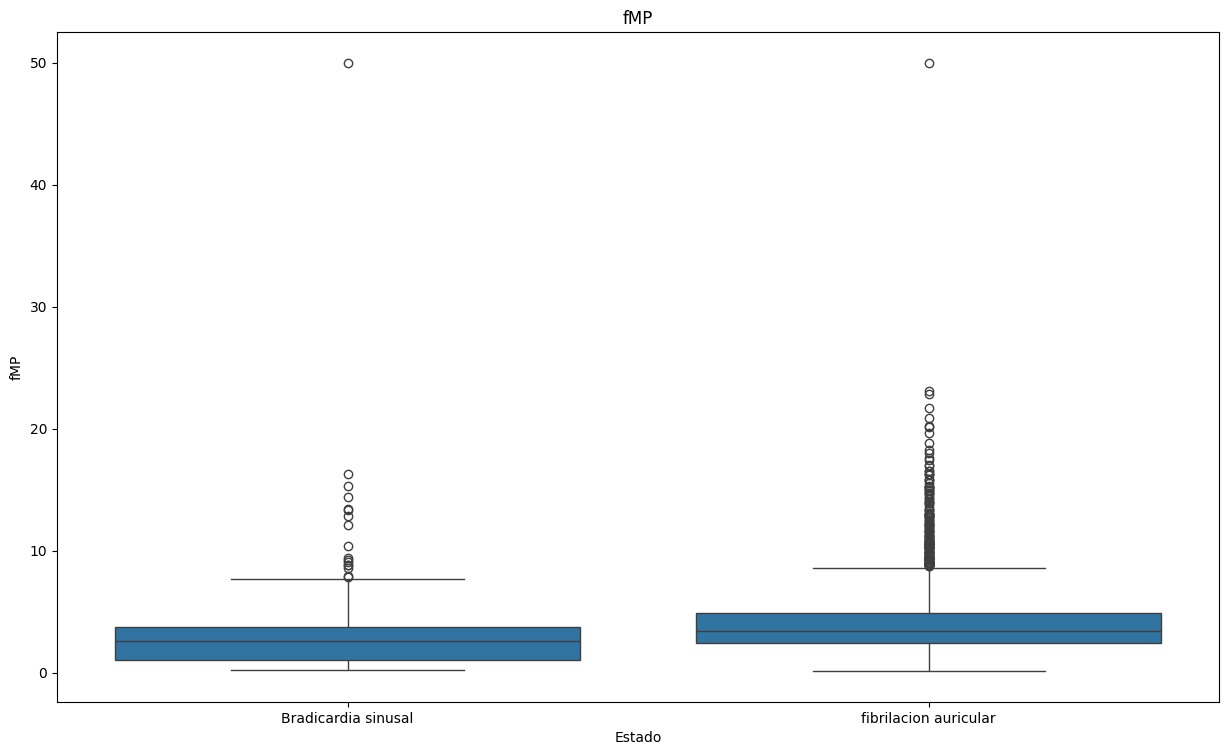

In [32]:
import seaborn as sns
plt.figure(figsize=(15, 40))
plt.subplot(4,1,1)
sns.boxplot(x='Estado', y='fMP', data=df_concatenado)
plt.title('fMP')

Text(0.5, 1.0, 'sFSB')

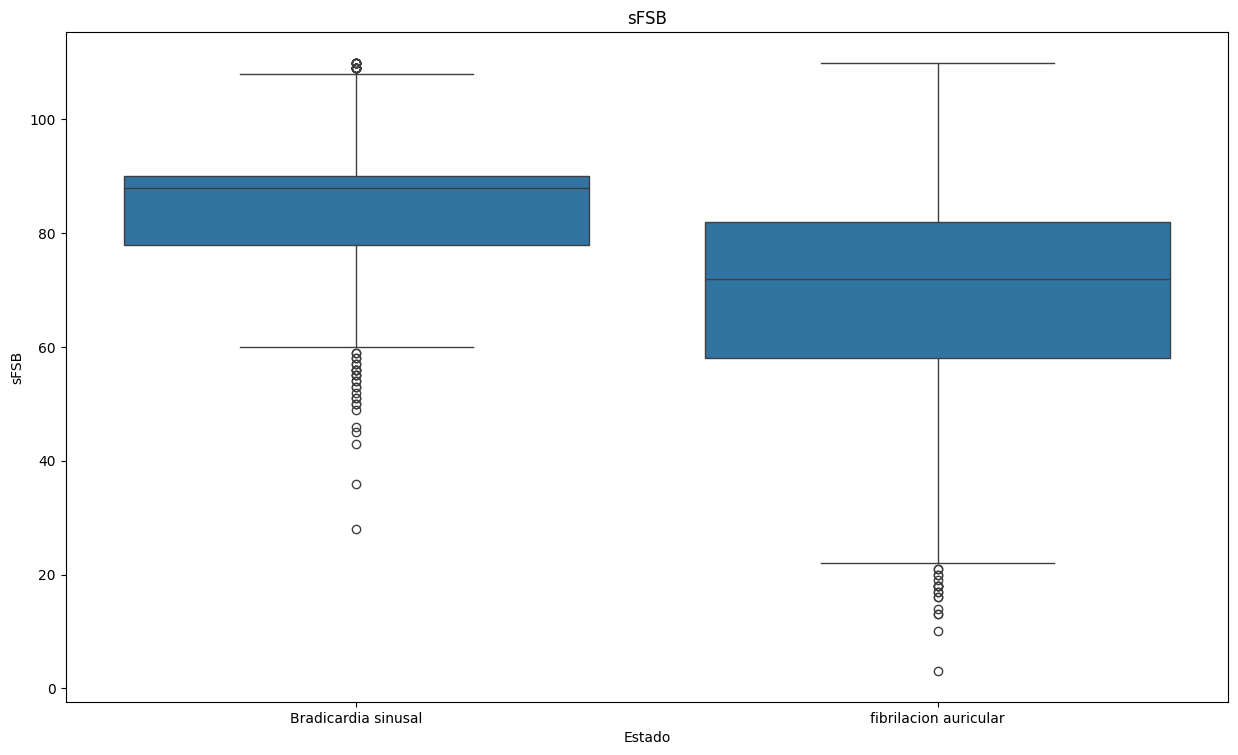

In [33]:
plt.figure(figsize=(15, 40))
plt.subplot(4,1,1)
sns.boxplot(x='Estado', y='sFSB', data=df_concatenado)
plt.title('sFSB')

###**Pruebas de Hipotesis**

In [34]:
from scipy import stats
from scipy.stats import mannwhitneyu


**Prueba de Normalidad**

In [35]:
df_fMP = df_concatenado[df_concatenado.Estado == 'Bradicardia sinusal']
df_fibrilacion = df_concatenado[df_concatenado.Estado == 'fibrilacion auricular']

print('Normalidad Bradicardia sinusal: ')
_ , p_value_c = stats.shapiro(df_fMP["fMP"])
print(f'fMP: {p_value_c}')
_ , p_value_c = stats.shapiro(df_fMP["sFSB"])
print(f'sFSB: {p_value_c}')

print('Normalidad Fibrilacion auricular: ')
_ , p_value_c = stats.shapiro(df_fibrilacion["fMP"])
print(f'fMP: {p_value_c}')
_ , p_value_c = stats.shapiro(df_fibrilacion["sFSB"])
print(f'sFSB: {p_value_c}')

Normalidad Bradicardia sinusal: 
fMP: 7.53364602823008e-51
sFSB: 1.7310432786004994e-31
Normalidad Fibrilacion auricular: 
fMP: 2.780253778687276e-46
sFSB: 1.408526954050891e-16


**Prueba de independencia**

Son dos grupos *independientes* fisica y temporalmente, por que al ser distintos sujetos en ambos grupos, no dependen entre ellos

**Prueba de homocedasticidad**



In [36]:
_, p_value = stats.levene(df_fMP["fMP"],df_fibrilacion["fMP"])
print(p_value)
_, p_value = stats.levene(df_fMP["sFSB"],df_fibrilacion["sFSB"])
print(p_value)

1.8127272020773092e-17
2.0213286446913638e-103


**Prueba de U de mann whitney**

In [37]:
statistic , p_value = mannwhitneyu(df_fMP["fMP"],df_fibrilacion["fMP"])
print(p_value)
statistic , p_value = mannwhitneyu(df_fMP["sFSB"],df_fibrilacion["sFSB"])
print(p_value)

4.873222160268216e-98
2.5292260997653916e-197


Como todos los p- valor < 0.05 se rechaza Ho, lo que significa que las enfermedades  analizadas tienen una diferencia estadisticamente significativa en comparación con los sujetos sanos.


---


